In [1]:
# Team Jupiter

## A look into a movies success?    

---

In [2]:
##     Main Data Analysis Questions

### 1. Does a movies budget influence box office success?   
###     (budget - IV, continuous) (worldwide gross adjusted for inflation - DV, continuous)
###     Linear Regression analysis



### 2. Does a movies rating or genre influence % of budget recovered (how profitable a movie is)?
#####           (does the genre or how much people like the movie influence how much it makes?)
###     (rating & genres - IV, category) (% of budget recovered - DV, continuous) ANOVA analysis


##     Supplemental Questions
### How well does comedy and fantasy genres fair against action, horror or other most common genres?
### Does the top rated genre change by over time? Does the most profitable genre change over time?
### Are movies more profitable now (2010-2020's) compared to when I was a child (1980-1990's)?  or by decades
### What are the most common genre tags for the top 100?

---

In [3]:
# import in packages needed for the project

import pandas as pd                 # to load in data
import numpy as np                  # to transform data
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm       # statsmodel packages to test for assumptions
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy                        # scipy to run ANOVAs
from scipy import stats 
from scipy.stats import boxcox
import glob                         # to import,read and combine multiple csv files at once if needed
import os

---

In [4]:
# Import data for analysis

# read in movie list and ratings files

ratings_df = pd.read_csv("../Data/ratings.csv")
movies_df = pd.read_csv("../Data/movies.csv")

In [5]:
# read in movie budgets, top 500 movies and best films since 1950 csv files

top500movies_df = pd.read_csv("../Data/Most Profitable Movies of All Time - Top 500 Movies (pink = added by us).csv")
hollywood_df = pd.read_csv("../Data/The Hollywood Insider - all data.csv")

---

In [6]:
# Explore data, format columns if needed for stats testing

In [7]:
# look at the data frame that contains the budget and box office sales data, DOES NOT CONTAIN RATINGS or GENRES
top500movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          558 non-null    object 
 1   worldwide gross (m)            558 non-null    float64
 2   % budget recovered             558 non-null    object 
 3   X times budget recovered       558 non-null    float64
 4   budget  (millions)             558 non-null    float64
 5   domestic gross (m)             558 non-null    float64
 6   domestic %                     558 non-null    object 
 7   international gross (m)        558 non-null    object 
 8   % of gross from international  558 non-null    object 
 9   worldwide gross                558 non-null    object 
 10  year                           558 non-null    int64  
 11  decade                         558 non-null    object 
 12  source                         477 non-null    obj

In [8]:
list(top500movies_df)

['title ',
 'worldwide gross (m)',
 '% budget recovered',
 'X times budget recovered',
 'budget  (millions)',
 'domestic gross (m)',
 'domestic %',
 'international gross (m)',
 '% of gross from international',
 'worldwide gross',
 'year',
 'decade',
 'source',
 'budget source',
 'force label',
 'horror']

In [9]:
top500movies_df.head()

,title,worldwide gross (m),% budget recovered,X times budget recovered,budget (millions),domestic gross (m),domestic %,international gross (m),% of gross from international,worldwide gross,year,decade,source,budget source,force label,horror
0,300,456.0,702%,7.0,65.0,211.0,46.2%,245,53.8%,"456,082,343",2007,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
1,1917,385.0,427%,4.3,90.0,159.0,41.4%,225,58.6%,"384,576,334",2019,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://www.nytimes.com/2020/01/12/movies/1917...,NaN,not horror
2,2012,791.0,396%,4.0,200.0,166.0,21.0%,625,79.0%,"791,217,826",2009,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
3,101 Dalmatians,321.0,479%,4.8,67.0,136.0,42.5%,185,57.5%,"320,689,294",1996,1990's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://en.wikipedia.org/wiki/101_Dalmatians_(...,NaN,not horror
4,22 Jump Street,331.0,663%,6.6,50.0,192.0,57.9%,140,42.1%,"331,333,876",2014,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror


In [10]:
# look at min/max values for movies release year
top500movies_df['year'].describe()

count     558.000000
mean     2009.568100
std         8.895454
min      1973.000000
25%      2005.000000
50%      2012.000000
75%      2016.000000
max      2022.000000
Name: year, dtype: float64

In [11]:
# look at min/max values for movies budgets
top500movies_df['budget  (millions)'].describe()

count    558.000000
mean     108.073235
std       75.962410
min        0.015000
25%       42.250000
50%      100.000000
75%      163.750000
max      379.000000
Name: budget  (millions), dtype: float64

In [12]:
# look at min/max values for movies profits
top500movies_df['X times budget recovered'].describe()

count      558.000000
mean        36.069713
std        551.723372
min          1.300000
25%          3.600000
50%          5.300000
75%         10.700000
max      12933.300000
Name: X times budget recovered, dtype: float64

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\2703773938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top500movies_df['X times budget recovered'])


<AxesSubplot: xlabel='X times budget recovered', ylabel='Density'>

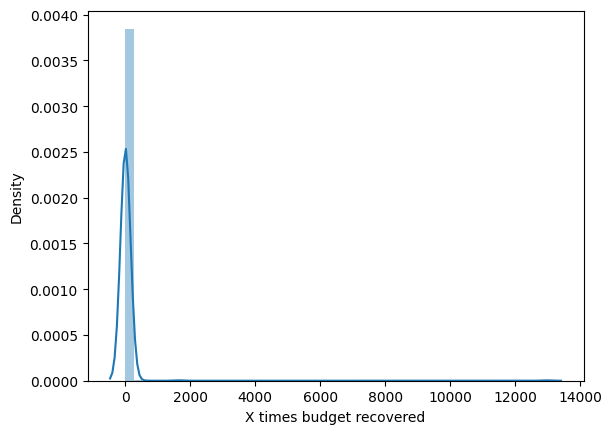

In [13]:
sns.distplot(top500movies_df['X times budget recovered'])

In [14]:
# look at gross worldwide for movies 
top500movies_df['worldwide gross (m)'].describe()

count     558.000000
mean      531.648387
std       357.544845
min         4.000000
25%       341.250000
50%       431.500000
75%       667.750000
max      2923.000000
Name: worldwide gross (m), dtype: float64

In [15]:
# a look at how many movies from each decade 
top500movies_df.decade.value_counts()

2010's    312
2000's    142
1990's     59
2020's     26
1980's     15
1970's      4
Name: decade, dtype: int64

In [16]:
top500movies_df.groupby('decade').mean()

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\561523732.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top500movies_df.groupby('decade').mean()


,worldwide gross (m),X times budget recovered,budget (millions),domestic gross (m),year
decade,,,,,
1970's,522.250000,56.550000,9.500000,287.500000,1975.750000
1980's,409.133333,20.460000,27.633333,221.533333,1985.400000
1990's,476.915254,37.974576,63.900847,195.288136,1995.338983
2000's,523.570423,97.846479,116.388134,212.069014,2005.366197
2010's,538.185256,10.737500,112.324038,192.983654,2014.785256
2020's,693.653846,4.192308,173.461538,268.153846,2021.346154


---

# Looking at my first question 

##    Does a movies budget influnce box office success (gross)?
##     IV -  budget (m) is continuous, float64 '177.0'
##     DV -  worldwide or domestic gross (m) is continuous, float64 '967.0'

## This looks like its fits for a linear regression, lets test the assumptions to find out.

In [17]:
# create a copy df to use for analysis

top500movies_df1 = top500movies_df.drop(top500movies_df.columns[[0,2,6,7,8,9,10,11,12,13,14,15]], axis=1)
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   worldwide gross (m)       558 non-null    float64
 1   X times budget recovered  558 non-null    float64
 2   budget  (millions)        558 non-null    float64
 3   domestic gross (m)        558 non-null    float64
dtypes: float64(4)
memory usage: 17.6 KB


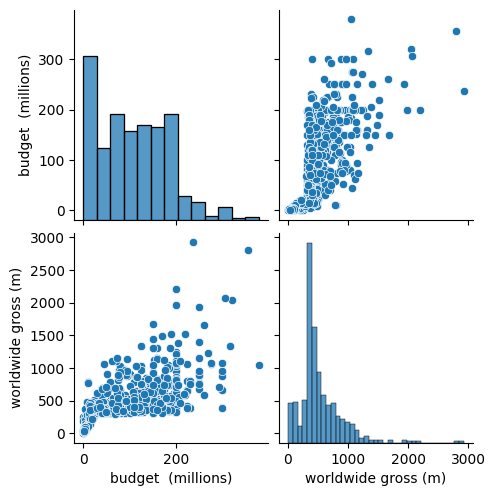

In [18]:
## create a scatter plot to test for linearity
WorldGross_LR = top500movies_df1[['budget  (millions)', 'worldwide gross (m)']].copy()
sns.pairplot(WorldGross_LR)

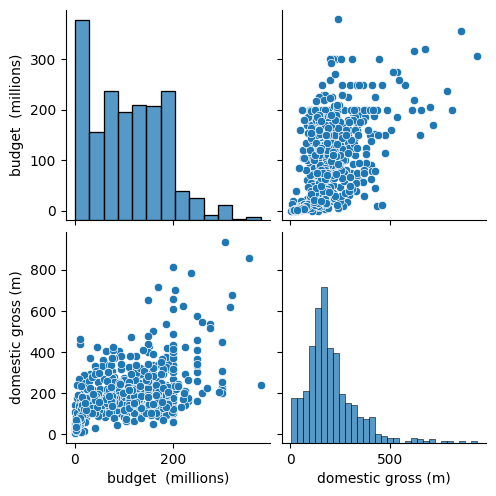

In [19]:
## does not appear to be normally distributed, look at domestic gross as well

Domestic_LR = top500movies_df1[['budget  (millions)', 'domestic gross (m)']].copy()
sns.pairplot(Domestic_LR)

In [20]:
## budget still seems a little skewed but the scatter plot does appear to become slighlty more linear

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\2885834539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WorldGross_LR['budget  (millions)'])


<AxesSubplot: xlabel='budget  (millions)', ylabel='Density'>

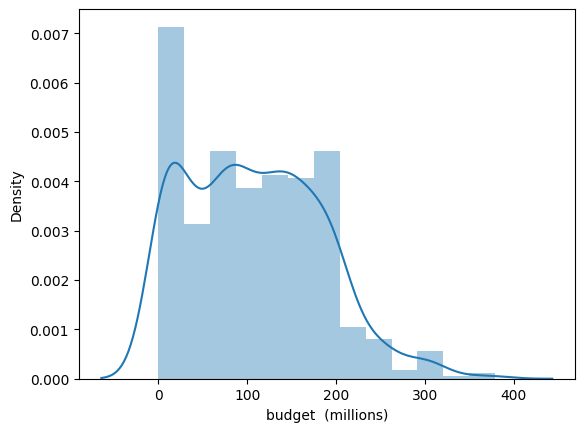

In [21]:
sns.distplot(WorldGross_LR['budget  (millions)'])

In [22]:
## the budget distribution plot look rougly even, Worldwide & Domestic are skewed slightly positive

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\731552005.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WorldGross_LR['worldwide gross (m)'])


<AxesSubplot: xlabel='worldwide gross (m)', ylabel='Density'>

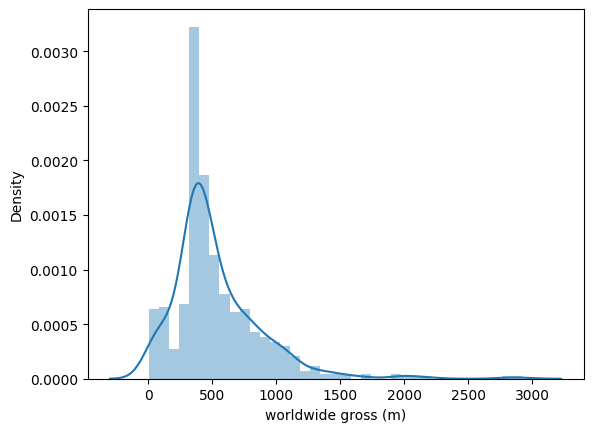

In [23]:
sns.distplot(WorldGross_LR['worldwide gross (m)'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\3520876942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WorldGross_LR['worldwide gross (m)SQRT'])


<AxesSubplot: xlabel='worldwide gross (m)SQRT', ylabel='Density'>

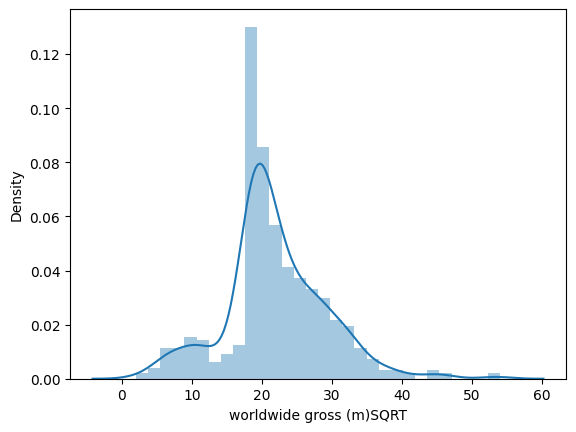

In [24]:
WorldGross_LR['worldwide gross (m)SQRT'] = np.sqrt(WorldGross_LR['worldwide gross (m)'])
sns.distplot(WorldGross_LR['worldwide gross (m)SQRT'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\422701408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Domestic_LR['domestic gross (m)'])


<AxesSubplot: xlabel='domestic gross (m)', ylabel='Density'>

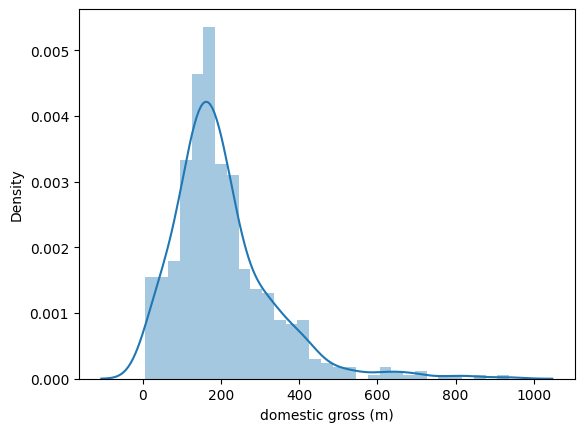

In [25]:
sns.distplot(Domestic_LR['domestic gross (m)'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\1025350852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Domestic_LR['domestic gross (m)SQRT'])


<AxesSubplot: xlabel='domestic gross (m)SQRT', ylabel='Density'>

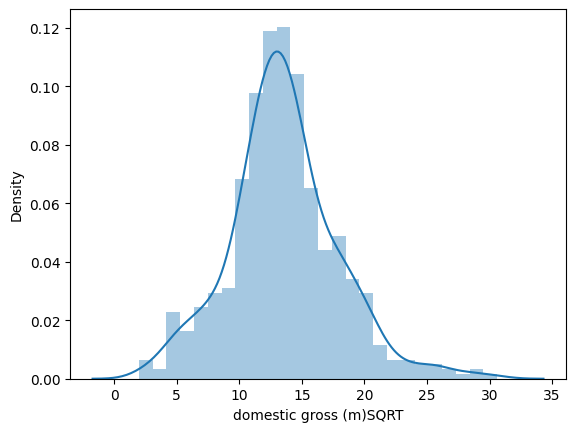

In [26]:
Domestic_LR['domestic gross (m)SQRT'] = np.sqrt(Domestic_LR['domestic gross (m)'])
sns.distplot(Domestic_LR['domestic gross (m)SQRT'])

In [27]:
# When Domestic is transformed using the square root function to correct of the positive skew it becomes normal.

In [28]:
## next test for Homoscedasticity for worldwide gross

x1 = WorldGross_LR['budget  (millions)']
y1 = WorldGross_LR['worldwide gross (m)SQRT']

WorldLR_model = sm.OLS(y1,x1).fit()

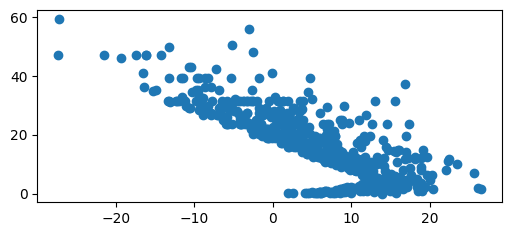

In [29]:
## next plot the residuals from the model

pred_val = WorldLR_model.fittedvalues.copy()
true_val = WorldGross_LR['worldwide gross (m)SQRT'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [30]:
# does not appear to be linear, there is a 'grouping' to it

In [31]:
## next test for Homoscedasticity for domestic gross

x2 = Domestic_LR['budget  (millions)']
y2 = Domestic_LR['domestic gross (m)SQRT']

DomesticLR_model = sm.OLS(y2,x2).fit()

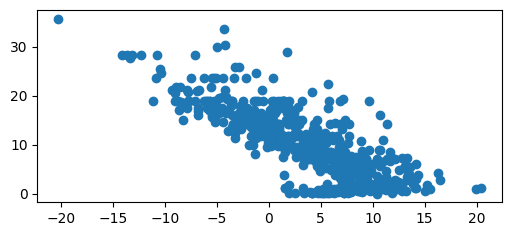

In [32]:
## next plot the residuals from the model

pred_val = DomesticLR_model.fittedvalues.copy()
true_val = Domestic_LR['domestic gross (m)SQRT'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [33]:
# The domestic model has a more linear lining up of the data points

In [34]:
# Breusch Pagan test , both df models using same budget column
sms.diagnostic.het_breuschpagan(residual, WorldGross_LR[['budget  (millions)']])

(87.7066447949598, nan, 103.87686878861744, 1.7524508706188376e-22)

### p-value is less than 0.5 (stastically significant)
### Violated the assumption of Homoscedasticity

In [35]:
# Harvey Collier test - worldwide
sms.linear_harvey_collier(WorldLR_model)

TtestResult(statistic=11.130631754913676, pvalue=4.135725228264187e-26, df=554)

In [36]:
# Harvey Collier test - domestic
sms.linear_harvey_collier(DomesticLR_model)

TtestResult(statistic=11.70951439573123, pvalue=1.8848896504606738e-28, df=554)

### Both test come back still show that the data violates the assumption of homoscedasticity.

(array([ 45.,  56.,  38.,  54.,  93.,  86., 106.,  63.,  13.,   4.]),
 array([-1.65590212,  2.93172015,  7.51934243, 12.1069647 , 16.69458698,
        21.28220925, 25.86983153, 30.4574538 , 35.04507608, 39.63269835,
        44.22032063]),
 <BarContainer object of 10 artists>)

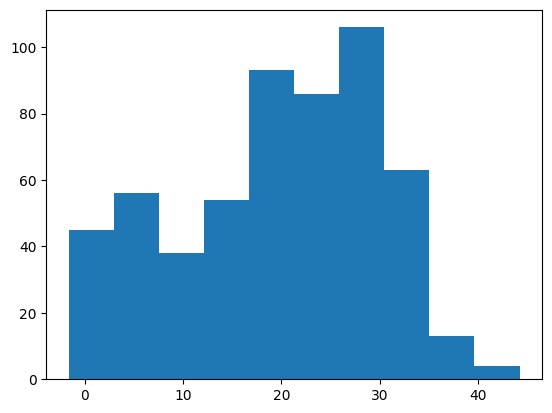

In [37]:
# try Box-Cox transformation
transformed, _ = boxcox(WorldGross_LR['budget  (millions)'])
plt.hist(transformed)

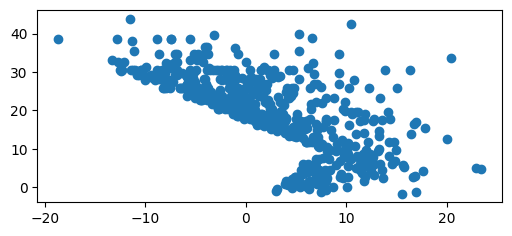

In [38]:
x = transformed
WorldLR_model = sm.OLS(y1,x).fit()
pred_val = WorldLR_model.fittedvalues.copy()
true_val = WorldGross_LR['worldwide gross (m)SQRT'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [39]:
# change WorldLR_model back from the box-cox transformation
x1 = WorldGross_LR['budget  (millions)']
y1 = WorldGross_LR['worldwide gross (m)SQRT']

WorldLR_model = sm.OLS(y1,x1).fit()

## Still violated the assumption of homoscedasticity, no reason to think domestic would be any different.

In [40]:
## test for multicollinearity

# correlation matrix for domestic gross x budget

top500movies_df1.corr()

,worldwide gross (m),X times budget recovered,budget (millions),domestic gross (m)
worldwide gross (m),1.000000,-0.049817,0.629408,0.896776
X times budget recovered,-0.049817,1.000000,-0.080470,-0.037488
budget (millions),0.629408,-0.080470,1.000000,0.514482
domestic gross (m),0.896776,-0.037488,0.514482,1.000000


C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\3233690065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top500movies_df.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot: >

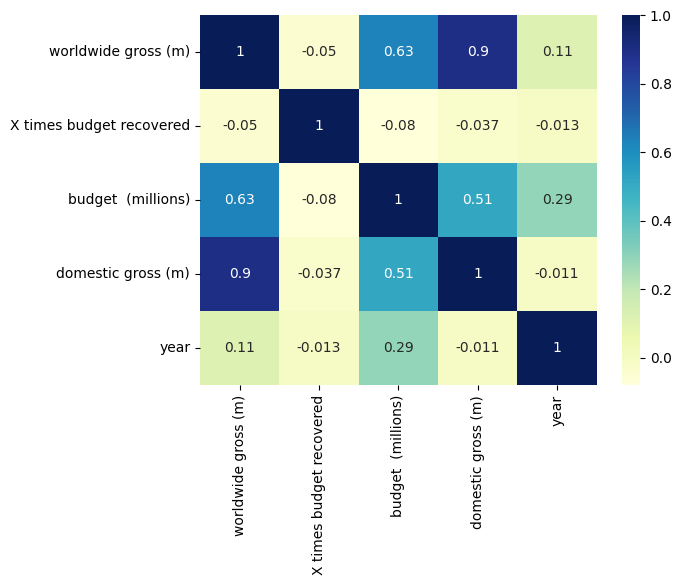

In [41]:
# heatmap for worlwide gross x budget
sns.heatmap(top500movies_df.corr(), cmap="YlGnBu", annot=True)

## Worldwide & Domestic gross are strongly correlated, but it appears that year and 'X times budget recovered' amount is not correlated with budget.

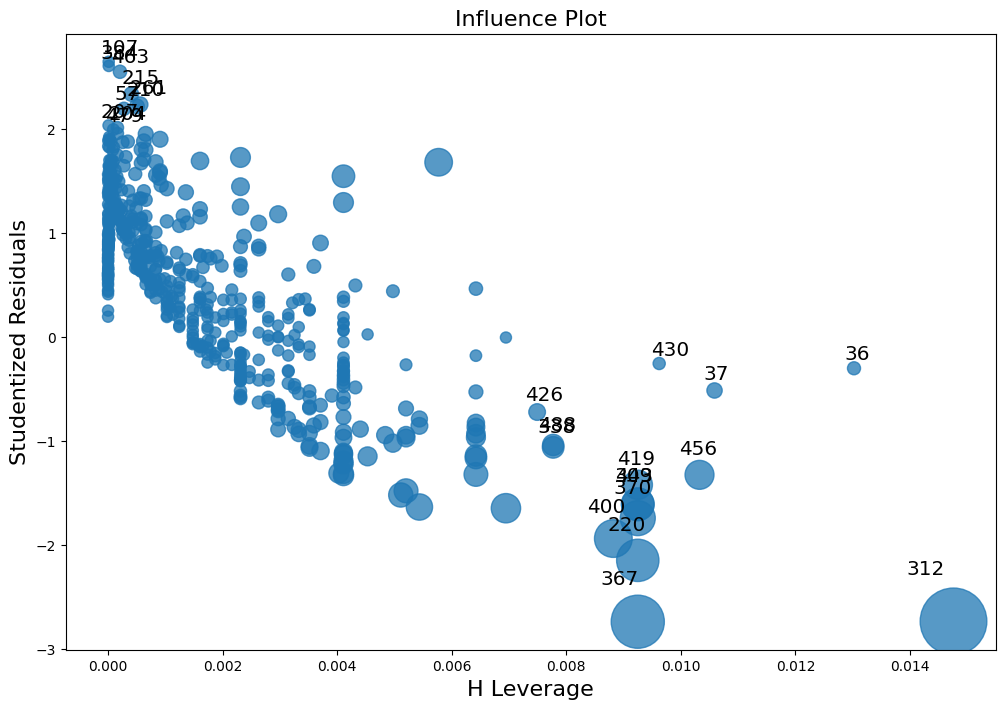

In [42]:
# plot that will test for outlier data points in X & Y space
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(WorldLR_model, alpha = .05, ax = ax, criterion="cooks")

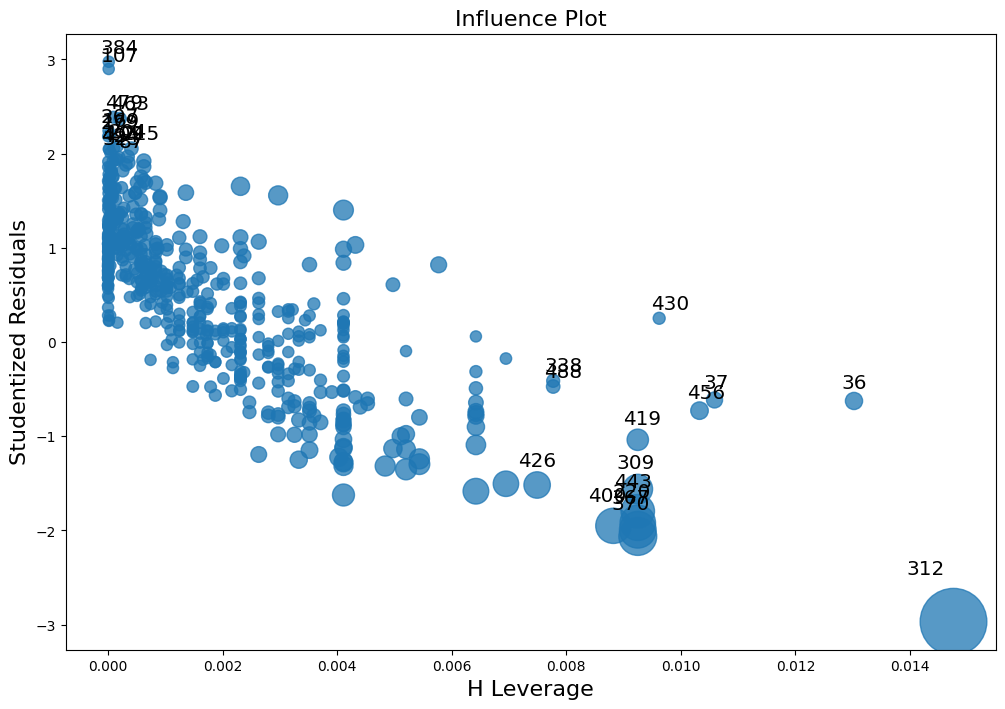

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(DomesticLR_model, alpha = .05, ax = ax, criterion="cooks")

# Data/table verison of outliers

In [44]:
# worldwide model
infl = WorldLR_model.get_influence()
print(infl.summary_frame())

     dfb_budget  (millions)   cooks_d  standard_resid  hat_diag  \
0                  0.023051  0.000531        1.105802  0.000434   
1                  0.015703  0.000247        0.544415  0.000832   
2                 -0.020976  0.000441       -0.326760  0.004110   
3                  0.015752  0.000248        0.733567  0.000461   
4                  0.016445  0.000270        1.025856  0.000257   
..                      ...       ...             ...       ...   
553               -0.032331  0.001046       -0.629863  0.002631   
554               -0.077400  0.005987       -1.146828  0.004532   
555                0.010226  0.000105        0.290069  0.001243   
556                0.014194  0.000202        0.521067  0.000742   
557                0.041758  0.001745        0.867626  0.002312   

     dffits_internal  student_resid    dffits  
0           0.023046       1.106023  0.023051  
1           0.015713       0.544071  0.015703  
2          -0.020993      -0.326498 -0.020976  
3  

In [45]:
# domestic model
infl = DomesticLR_model.get_influence()
print(infl.summary_frame())

     dfb_budget  (millions)   cooks_d  standard_resid  hat_diag  \
0                  0.025307  0.000640        1.213772  0.000434   
1                  0.017179  0.000295        0.595538  0.000832   
2                 -0.055734  0.003108       -0.867722  0.004110   
3                  0.016584  0.000275        0.772275  0.000461   
4                  0.021199  0.000449        1.321551  0.000257   
..                      ...       ...             ...       ...   
553               -0.022404  0.000503       -0.436550  0.002631   
554               -0.044168  0.001953       -0.654959  0.004532   
555                0.021853  0.000478        0.619693  0.001243   
556               -0.005171  0.000027       -0.189881  0.000742   
557                0.030032  0.000903        0.624191  0.002312   

     dffits_internal  student_resid    dffits  
0           0.025296       1.214289  0.025307  
1           0.017189       0.595193  0.017179  
2          -0.055746      -0.867529 -0.055734  
3  

## We won't drop outliers as we belive the data to be accurate and is representative of the real world situation

In [46]:
# Interpreting the Regression Output - Worldwide

WorldLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     worldwide gross (m)SQRT   R-squared (uncentered):                   0.809
Model:                                 OLS   Adj. R-squared (uncentered):              0.809
Method:                      Least Squares   F-statistic:                              2362.
Date:                     Fri, 19 May 2023   Prob (F-statistic):                   1.68e-202
Time:                             13:48:54   Log-Likelihood:                         -2080.6
No. Observations:                      558   AIC:                                      4163.
Df Residuals:                          557   BIC:                                      4168.
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
budget  (millions)     0.1571      0.003     48.601      0.000       0.151       0.163
==============================================================================
Omnibus:                       18.219   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.236
Skew:                          -0.452   Prob(JB):                     6.65e-05
Kurtosis:                       3.096   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Worldwide Gross Model summary
# p-value is <0.05, a movie's Budget has a significant effect on how much a movie grosses Worldwide
# adj r-squared shows this model accounts for 90% of the variance in explaining Worldwide Gross

In [47]:
# Interpreting the Regression Output - Domestic Gross

DomesticLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     domestic gross (m)SQRT   R-squared (uncentered):                   0.765
Model:                                OLS   Adj. R-squared (uncentered):              0.764
Method:                     Least Squares   F-statistic:                              1812.
Date:                    Fri, 19 May 2023   Prob (F-statistic):                   3.17e-177
Time:                            13:48:54   Log-Likelihood:                         -1870.3
No. Observations:                     558   AIC:                                      3743.
Df Residuals:                         557   BIC:                                      3747.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
budget  (millions)     0.0944      0.002     42.565      0.000       0.090       0.099
==============================================================================
Omnibus:                       13.238   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.589
Skew:                          -0.379   Prob(JB):                      0.00112
Kurtosis:                       3.101   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Domestic Gross Model summary
# 
# p-value is <0.05, a movie's Budget has a significant effect on how much a movie grosses Domestically
# adj r-squared shows this model accounts for 76% of the variance in explaining Domestic Gross

# A movies budget size has less of an effect on Gross in the US than worldwide!
# Do Americans prefer smaller budget, indie type movies or do only the big budget movies get promotion/advertising worldwide?

In [48]:
##### create a linear model to test for Domestic&Worldwide #####

---

# Looking at my second question

## 2. Does a movies rating or genre influence % of budget recovered (how profitable a movie is)?
##     (rating & genres - IV, category) (% of budget recovered - DV, continuous) ANOVA analysis

In [49]:
# lets look at the Hollywood Insider df that contains a movies critic & audience ratings, gross sales, budget info
hollywood_df.head()

,Film,Rotten Tomatoes % critics,Metacritic % critics,Average critics %,Rotten Tomatoes Audience %,Metacritic Audience %,Rotten Tomatoes vs Metacritic % deviance,Average audience %,Audience vs Critics deviance %,Primary Genre,...,Worldwide Gross,Worldwide Gross ($million),% of Gross earned abroad,Budget ($million),% Budget recovered,% Budget recovered opening weekend,Year,Oscar Winners,Oscar Detail,Link
0,9,57.0,60,58.5,58.0,67,-9,62.5,-4,animation,...,"48,410,000",48,34.44%,30,161%,35.67%,2009,NaN,NaN,http://www.amazon.com/gp/product/B00JNK2T7A/?t...
1,21,35.0,48,41.5,73.0,62,11,67.5,-26,crime,...,"157,930,000",158,48.61%,35,451%,68.86%,2008,NaN,NaN,http://www.amazon.com/gp/product/B001EMXS1Q/?t...
2,42,79.0,62,70.5,86.0,74,12,80,-9.5,Biography,...,"95,021,108",95,942.37%,40,238%,68.72%,2013,NaN,NaN,http://www.amazon.com/gp/product/B00DYQW6EU/?t...
3,300,60.0,51,55.5,89.0,71,18,80,-24.5,period,...,"456,068,181",456,53.82%,65,702%,109.05%,2007,NaN,NaN,http://www.amazon.co.uk/dp/B00EU7O4D8?ref_=imd...
4,2012,39.0,49,44,63.0,54,9,58.5,-14.5,action,...,"769,690,000",770,78.42%,200,385%,32.65%,2009,NaN,NaN,http://www.amazon.com/gp/product/B00S4P24GQ/?t...


In [50]:
hollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Film                                      1694 non-null   object 
 1   Rotten Tomatoes % critics                 1693 non-null   float64
 2   Metacritic % critics                      1694 non-null   object 
 3   Average critics %                         1694 non-null   object 
 4   Rotten Tomatoes Audience %                1693 non-null   float64
 5   Metacritic Audience %                     1694 non-null   object 
 6   Rotten Tomatoes vs Metacritic % deviance  1694 non-null   object 
 7   Average audience %                        1694 non-null   object 
 8   Audience vs Critics deviance %            1694 non-null   object 
 9   Primary Genre                             1694 non-null   object 
 10  Genres                              

--

In [51]:
# start data wrangling for analysis

In [52]:
# drop nulls
hollywood_test = hollywood_df.dropna()

In [53]:
# create new df with ratings, primary genre, year, & % of budget recovered
hollywood_test = hollywood_df.drop(hollywood_df.columns[[1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,29,31,32,33]], axis=1)
hollywood_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Film                        1694 non-null   object
 1   Average audience %          1694 non-null   object
 2   Primary Genre               1694 non-null   object
 3   Worldwide Gross ($million)  1694 non-null   object
 4   Budget ($million)           1694 non-null   object
 5   % Budget recovered          1670 non-null   object
 6   Year                        1694 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 92.8+ KB


In [54]:
hollywood_test.head()

,Film,Average audience %,Primary Genre,Worldwide Gross ($million),Budget ($million),% Budget recovered,Year
0,9,62.5,animation,48,30,161%,2009
1,21,67.5,crime,158,35,451%,2008
2,42,80,Biography,95,40,238%,2013
3,300,80,period,456,65,702%,2007
4,2012,58.5,action,770,200,385%,2009


In [55]:
# change the audience column values to numeric to re-code easier into categories
# change % Budget recovered to continuous

hollywood_test["Average audience %"] = hollywood_test["Average audience %"].str.replace('–','-').str.replace(r'^-$', '0', regex=True).astype(float)
hollywood_test['% Budget recovered'] = pd.to_numeric(hollywood_test['% Budget recovered'].str.strip('%')).div(100)
hollywood_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Film                        1694 non-null   object 
 1   Average audience %          1694 non-null   float64
 2   Primary Genre               1694 non-null   object 
 3   Worldwide Gross ($million)  1694 non-null   object 
 4   Budget ($million)           1694 non-null   object 
 5   % Budget recovered          1670 non-null   float64
 6   Year                        1694 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 92.8+ KB


In [56]:
hollywood_test['% Budget recovered'].describe()

count     1670.000000
mean        12.370493
std        316.075607
min          0.000000
25%          1.310000
50%          2.450000
75%          4.210000
max      12890.670000
Name: % Budget recovered, dtype: float64

In [57]:
# There is a movie that made 12,891x its budget!!

In [58]:
print(hollywood_test.loc[hollywood_test['% Budget recovered'] > 12800])

                     Film  Average audience % Primary Genre  \
909  Paranormal Activity                 56.5        horror   

    Worldwide Gross ($million) Budget ($million)  % Budget recovered  Year  
909                        193             0.015            12890.67  2009  


In [59]:
# Paranormal Activity recovered 1,289,067% of their budget!!

In [60]:
print(hollywood_test.loc[hollywood_test['% Budget recovered'] < 1])

                     Film  Average audience % Primary Genre  \
8              12 Rounds                 50.5        action   
15     20th Century Women                79.5        comedy   
17             21 Bridges                77.0      Thriller   
28               47 Ronin                55.5        Action   
35    A Cure for Wellness                55.5        horror   
...                   ...                 ...           ...   
1650       White Boy Rick                59.0         Crime   
1652            Whiteout                 43.5        action   
1664          Wonder Park                42.0     Adventure   
1666             Woodlawn                84.5         drama   
1683        Your Highness                42.5     adventure   

     Worldwide Gross ($million) Budget ($million)  % Budget recovered  Year  
8                            17                20                0.86  2009  
15                            0                 7                0.06  2016  
17       

In [61]:
# There were 272 movies in the data that did not make back their budget in gross sales!!
# 16% of the movies

In [62]:
print(hollywood_test.loc[hollywood_test['% Budget recovered'] > 100])

                      Film  Average audience % Primary Genre  \
837                 Ne Zha                96.0     Adventure   
858              No Escape                66.0        action   
909   Paranormal Activity                 56.5        horror   
1053             Searching                83.5      Thriller   
1272      The Devil Inside                24.0        horror   
1308           The Gallows                47.0        horror   

     Worldwide Gross ($million) Budget ($million)  % Budget recovered  Year  
837                         701                 5              140.11  2019  
858                          54                 0              120.74  2015  
909                         193             0.015            12890.67  2009  
1053                        754                 1              753.84  2018  
1272                        102                 1              101.76  2012  
1308                         38                 0              381.64  2015  


In [63]:
hollywood_test['Average audience %'].describe()

count    1694.000000
mean       62.767414
std        15.068222
min         0.000000
25%        52.500000
50%        63.500000
75%        74.000000
max        96.000000
Name: Average audience %, dtype: float64

In [64]:
# reformat ratings into groups:
##      ['The Good' : 100-67, 'The Bad' : 66-33, 'The Ugly' : 32-0 ]

hollywood_test['ratings'] = hollywood_test['Average audience %'].map(lambda x: 'The Good' if x>=67 else 'The Bad' if x<67 and x>=33 else 'The Ugly')
hollywood_test['ratings'].value_counts()

The Bad     928
The Good    716
The Ugly     50
Name: ratings, dtype: int64

In [65]:
def recode (series):
    if series == "The Good": 
        return 0
    if series == "The Bad": 
        return 1
    if series == "The Ugly": 
        return 2

hollywood_test['ratingsR'] = hollywood_test['ratings'].apply(recode)

In [66]:
# reformat genres
a= hollywood_test['Primary Genre'].unique()
print(sorted(a))

['Action', 'Adventure', 'Animation', 'Biography', 'Black Comedy', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'action', 'adventure', 'adventure ', 'animation', 'biography', 'biography ', 'biography  ', 'comedy', 'crime', 'crime ', 'drama', 'drama ', 'family', 'fantasy', 'fantasy ', 'history', 'horror', 'music', 'music  ', 'musical', 'mystery', 'mystery ', 'period', 'romance', 'romantic comedy', 'sci-fi', 'sci-fi ', 'sport', 'sports', 'thriller', 'war', 'western']


In [67]:
# need to drop spaces before and after strings, and make all strings lowercase
hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].str.lower()

In [68]:
hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].str.strip()

In [69]:
a= hollywood_test['Primary Genre'].unique()
print(sorted(a))

['action', 'adventure', 'animation', 'biography', 'black comedy', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery', 'period', 'romance', 'romantic comedy', 'sci-fi', 'sport', 'sports', 'thriller', 'war', 'western']


In [70]:
# duplicate genres are ('black comedy', 'romantic comedy', 'comedy'), ('music', 'musical'), ('sport', 'sports')

hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].apply(lambda x: x.replace('black comedy', 'comedy'))
hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].apply(lambda x: x.replace('romantic comedy', 'comedy'))
hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].apply(lambda x: x.replace('music', 'musical'))
hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].apply(lambda x: x.replace('sport', 'sports'))

In [71]:
a= hollywood_test['Primary Genre'].unique()
print(sorted(a))

['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'history', 'horror', 'musical', 'musicalal', 'mystery', 'period', 'romance', 'sci-fi', 'sports', 'sportss', 'thriller', 'war', 'western']


In [72]:
# music and sports strings got messed up

hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].apply(lambda x: x.replace('musicalal', 'musical'))
hollywood_test['Primary Genre'] = hollywood_test['Primary Genre'].apply(lambda x: x.replace('sportss', 'sports'))
a= hollywood_test['Primary Genre'].unique()
print(sorted(a))

['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'history', 'horror', 'musical', 'mystery', 'period', 'romance', 'sci-fi', 'sports', 'thriller', 'war', 'western']


In [73]:
# all duplicates and white spaces appear to have be removed
hollywood_test['Primary Genre'].describe()

count       1694
unique        20
top       action
freq         394
Name: Primary Genre, dtype: object

In [74]:
hollywood_test['Primary Genre'].value_counts()

action       394
comedy       346
drama        249
adventure    141
horror       116
animation     92
thriller      83
sci-fi        48
biography     45
crime         43
romance       43
fantasy       25
mystery       21
musical       16
family        10
history        6
sports         6
period         4
war            4
western        2
Name: Primary Genre, dtype: int64

In [75]:
# 21 different Genres
# top 10 genres with the most movies : action, comedy, drama, adventure, horror, animation, thriller, sci-fi, biopgraphy, romance (crime is tied)

In [76]:
# list of the genres that have the highest average audience score
hollywood_test.groupby(['Primary Genre'])['Average audience %'].mean().sort_values(ascending=False)

Primary Genre
western      74.750000
history      74.083333
biography    73.822222
sports       72.166667
drama        69.965863
musical      68.531250
animation    67.413043
crime        65.383721
adventure    64.329787
mystery      64.023810
period       62.750000
action       62.299492
sci-fi       61.343750
thriller     61.162651
family       60.900000
war          59.000000
fantasy      58.120000
comedy       58.085260
romance      57.976744
horror       54.534483
Name: Average audience %, dtype: float64

In [77]:
hollywood_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Film                        1694 non-null   object 
 1   Average audience %          1694 non-null   float64
 2   Primary Genre               1694 non-null   object 
 3   Worldwide Gross ($million)  1694 non-null   object 
 4   Budget ($million)           1694 non-null   object 
 5   % Budget recovered          1670 non-null   float64
 6   Year                        1694 non-null   int64  
 7   ratings                     1694 non-null   object 
 8   ratingsR                    1694 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 119.2+ KB


In [78]:
def recode (series):
    if series == "action": 
        return 0
    if series == "comedy": 
        return 1
    if series == "drama": 
        return 2
    if series == "adventure": 
        return 3
    if series == "horror": 
        return 4
    if series == "animation": 
        return 5
    if series == "thriller": 
        return 6
    if series == "sci-fi": 
        return 7
    if series == "biography": 
        return 8
    if series == "crime": 
        return 9
    if series == "romance": 
        return 10
    if series == "fantasy": 
        return 11
    if series == "mystery": 
        return 12
    if series == "musical": 
        return 13
    if series == "family": 
        return 14
    if series == "history": 
        return 15
    if series == "sports": 
        return 16
    if series == "fantasy": 
        return 17
    if series == "period": 
        return 18
    if series == "mystery": 
        return 19
    if series == "war": 
        return 20
    if series == "western": 
        return 21

hollywood_test['genreR'] = hollywood_test['Primary Genre'].apply(recode)

In [79]:
hollywood_test.head()

,Film,Average audience %,Primary Genre,Worldwide Gross ($million),Budget ($million),% Budget recovered,Year,ratings,ratingsR,genreR
0,9,62.5,animation,48,30,1.61,2009,The Bad,1,5
1,21,67.5,crime,158,35,4.51,2008,The Good,0,9
2,42,80.0,biography,95,40,2.38,2013,The Good,0,8
3,300,80.0,period,456,65,7.02,2007,The Good,0,18
4,2012,58.5,action,770,200,3.85,2009,The Bad,1,0


In [80]:
# done with data wrangling time to test for assumptions

---

In [81]:
# Testing Assumptions

In [82]:
# create df for assumtion testing
hollywood_test1 = hollywood_test[['% Budget recovered', 'genreR', 'ratingsR']]
hollywood_test1.head()

,% Budget recovered,genreR,ratingsR
0,1.61,5,1
1,4.51,9,0
2,2.38,8,0
3,7.02,18,0
4,3.85,0,1


C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\3179810661.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hollywood_test1['% Budget recovered'])


<AxesSubplot: xlabel='% Budget recovered', ylabel='Density'>

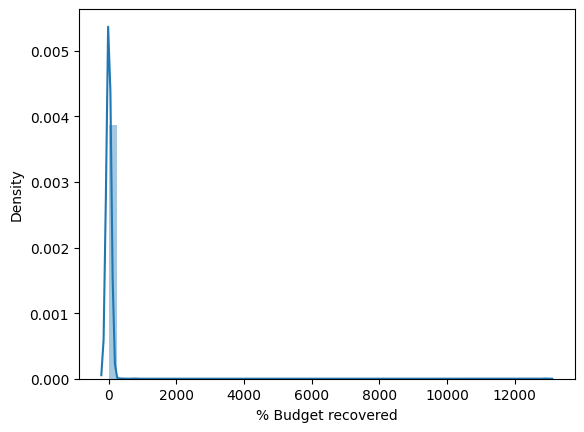

In [83]:
# Test for Normality
# only need to test for the normality of the dependent variable, since the IV is categorical

sns.distplot(hollywood_test1['% Budget recovered'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\1009246439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hollywood_test1['% Budget recovered SQRT'] = np.sqrt(hollywood_test1['% Budget recovered'])
C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\1009246439.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hollywood_test1['% Budget recovered SQRT'])


<AxesSubplot: xlabel='% Budget recovered SQRT', ylabel='Density'>

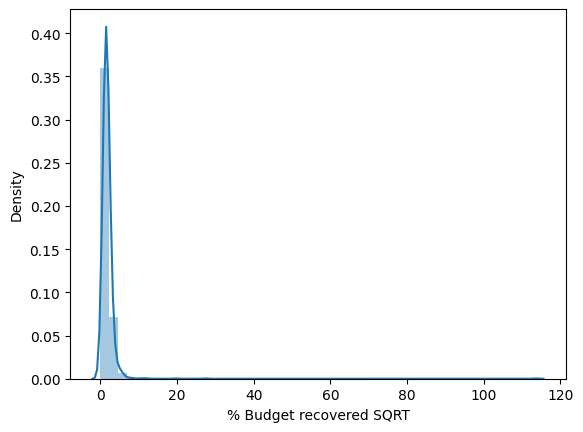

In [84]:
# it is very highly positively skewed
hollywood_test1['% Budget recovered SQRT'] = np.sqrt(hollywood_test1['% Budget recovered'])
sns.distplot(hollywood_test1['% Budget recovered SQRT'])

In [85]:
# Homogeneity of Variance

scipy.stats.bartlett(hollywood_test1['% Budget recovered'], hollywood_test1['ratingsR'])

BartlettResult(statistic=19187.936928703246, pvalue=0.0)

In [86]:
# p-value is < .05, data has violated the assumption of homogeneity of variance

In [87]:
scipy.stats.bartlett(hollywood_test1['% Budget recovered'], hollywood_test1['genreR'])

BartlettResult(statistic=12754.52051155985, pvalue=0.0)

In [88]:
# p-value is < .05, data has violated the assumption of homogeneity of variance

In [89]:
# Sample Size - need at least 20 per IV

# drop genres with less than 20 movies
hollywood_test['Primary Genre'].value_counts()

action       394
comedy       346
drama        249
adventure    141
horror       116
animation     92
thriller      83
sci-fi        48
biography     45
crime         43
romance       43
fantasy       25
mystery       21
musical       16
family        10
history        6
sports         6
period         4
war            4
western        2
Name: Primary Genre, dtype: int64

In [90]:
# drop 'musical', 'family', 'history', 'sports', 'period', 'war', 'western'
values = [13, 14, 15, 16, 18, 20, 21]
hollywood_test1 = hollywood_test1[hollywood_test1.genreR.isin(values) == False]
hollywood_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1693
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   % Budget recovered       1622 non-null   float64
 1   genreR                   1646 non-null   int64  
 2   ratingsR                 1646 non-null   int64  
 3   % Budget recovered SQRT  1622 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 64.3 KB


In [91]:
# Independence
# There is no statistical test for the assumption of independence.

---

In [92]:
# Running Analysis

In [93]:
# drop extra columns created for assumption testing

anova_df = hollywood_test
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Film                        1694 non-null   object 
 1   Average audience %          1694 non-null   float64
 2   Primary Genre               1694 non-null   object 
 3   Worldwide Gross ($million)  1694 non-null   object 
 4   Budget ($million)           1694 non-null   object 
 5   % Budget recovered          1670 non-null   float64
 6   Year                        1694 non-null   int64  
 7   ratings                     1694 non-null   object 
 8   ratingsR                    1694 non-null   int64  
 9   genreR                      1694 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 132.5+ KB


In [94]:
# rename columns to make coding easier

anova_df.rename(columns={'Primary Genre': 'Genre', '% Budget recovered': 'BudgetRecovered'}, inplace=True)
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Film                        1694 non-null   object 
 1   Average audience %          1694 non-null   float64
 2   Genre                       1694 non-null   object 
 3   Worldwide Gross ($million)  1694 non-null   object 
 4   Budget ($million)           1694 non-null   object 
 5   BudgetRecovered             1670 non-null   float64
 6   Year                        1694 non-null   int64  
 7   ratings                     1694 non-null   object 
 8   ratingsR                    1694 non-null   int64  
 9   genreR                      1694 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 132.5+ KB


In [95]:
# Computing two-way ANOVA with Unequal Variance (Violated Homogeneity of Variance Assumption)

ANOVA_model = ols(
    'BudgetRecovered ~ C(Genre) + C(ratings) + C(Genre):C(ratings)', data=anova_df).fit()
sm.stats.anova_lm(ANOVA_model, typ=2)

C:\Python3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 19, but rank is 10
  warnings.warn('covariance of constraints does not have full '
C:\Python3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Python3\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Python3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 29
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Genre),2.273116e+06,19.0,1.177350,0.30145
C(ratings),NaN,2.0,NaN,NaN
C(Genre):C(ratings),6.878080e+05,38.0,0.178123,1.00000
Residual,1.646181e+08,1620.0,NaN,NaN


In [96]:
# The Genre p-value 0.30145 is non-significant

# The ratings p-value NaN is significant, has a statistically significant effect on Budget recovered 

# The Genre*Ratings: p-value is equal to 1, non-significant 
# which indicates that there is no significant interaction effect between Genres and Ratings.

In [97]:
stats.f_oneway(anova_df['BudgetRecovered'][anova_df['ratings']=='The Good'],
                    anova_df['BudgetRecovered'][anova_df['ratings']=='The Bad'],
                    anova_df['BudgetRecovered'][anova_df['ratings']=='The Ugly'])

F_onewayResult(statistic=nan, pvalue=nan)

In [98]:
# Post Hoc - Genres

postHoc1 = MultiComparison(anova_df['BudgetRecovered'], anova_df['Genre'])
postHocResults1 = postHoc1.tukeyhsd()
print(postHocResults1)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2   meandiff p-adj lower upper reject
------------------------------------------------------
   action adventure       nan   nan   nan   nan  False
   action animation       nan   nan   nan   nan  False
   action biography       nan   nan   nan   nan  False
   action    comedy       nan   nan   nan   nan  False
   action     crime       nan   nan   nan   nan  False
   action     drama       nan   nan   nan   nan  False
   action    family       nan   nan   nan   nan  False
   action   fantasy       nan   nan   nan   nan  False
   action   history       nan   nan   nan   nan  False
   action    horror       nan   nan   nan   nan  False
   action   musical       nan   nan   nan   nan  False
   action   mystery       nan   nan   nan   nan  False
   action    period       nan   nan   nan   nan  False
   action   romance       nan   nan   nan   nan  False
   action    sci-fi       nan   nan   nan   nan  False
   action 

In [99]:
# There is no significant difference in the means between Genres execpt Horror & Thrillers

In [100]:
# look at the horror returns on budget
print(anova_df.loc[anova_df['Genre'] == 'horror'])

                           Film  Average audience %   Genre  \
23             30 Days of Night                60.5  horror   
26               47 Meters Down                41.5  horror   
35          A Cure for Wellness                55.5  horror   
41              A Haunted House                51.0  horror   
44    A Nightmare on Elm Street                46.5  horror   
...                         ...                 ...     ...   
1572                       Tusk                49.0  horror   
1594       Unfriended: Dark Web                40.5  horror   
1603                         Us                68.0  horror   
1604                    Vacancy                64.0  horror   
1661                  Wish Upon                36.0  horror   

     Worldwide Gross ($million) Budget ($million)  BudgetRecovered  Year  \
23                           75                32             2.35  2007   
26                           44                 6             8.06  2017   
35             

In [101]:
# Post Hoc - Ratings

postHoc2 = MultiComparison(anova_df['BudgetRecovered'], anova_df['ratingsR'])
postHocResults2 = postHoc2.tukeyhsd()
print(postHocResults2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     0      1      nan   nan   nan   nan  False
     0      2      nan   nan   nan   nan  False
     1      2      nan   nan   nan   nan  False
-----------------------------------------------


In [102]:
# There is no significant difference in the means between Ratings

In [103]:
# Determine Means and Draw Conclusions
anova_df.groupby('ratingsR').mean()


C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\1731719522.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anova_df.groupby('ratingsR').mean()


,Average audience %,BudgetRecovered,Year,genreR
ratingsR,,,,
0,76.734637,5.505537,2013.777933,3.488827
1,54.079741,17.967043,2012.795259,3.033405
2,24.000000,5.248980,2014.920000,2.880000


In [104]:
# mean grouped by ratings outliers dropped
anova_NoOutliers = anova_df
anova_NoOutliers = anova_NoOutliers.sort_values('BudgetRecovered', ascending=False)

In [105]:
anova_NoOutliers = anova_NoOutliers.drop([909,1053,1308], axis=0)

In [106]:
anova_NoOutliers.groupby('ratingsR').mean()

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\4201530272.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anova_NoOutliers.groupby('ratingsR').mean()


,Average audience %,BudgetRecovered,Year,genreR
ratingsR,,,,
0,76.725175,4.434959,2013.772028,3.485315
1,54.084773,3.564023,2012.796976,3.031317
2,24.000000,5.248980,2014.920000,2.880000


In [107]:
anova_NoOutliers['BudgetRecovered'].mean()

3.9787480247347813

In [108]:
#  ratingsR 0 = The Good , 1 = The Bad, 2 = The Ugly

# It appears that the highest and lowest rated movies both average about 5x their budgets in box office gross
# Average movies (rating mean of 54) have a mean return of 18x their budgets, this may be due to the extreme outlier 'Paranormal Activity'

# When correcting for outliers the mean for all 3 ratings groups all become closer with Average rated(The Bad) movies
# doing the worst on budget returned.

In [109]:
anova_df.groupby('Genre').mean()

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\393071217.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anova_df.groupby('Genre').mean()


,Average audience %,BudgetRecovered,Year,ratingsR,genreR
Genre,,,,,
action,62.299492,3.306885,2012.895939,0.631980,0.0
adventure,64.329787,3.941986,2013.886525,0.581560,3.0
animation,67.413043,3.159085,2011.869565,0.456522,5.0
biography,73.822222,3.927556,2011.822222,0.266667,8.0
comedy,58.085260,3.485146,2012.410405,0.771676,1.0
crime,65.383721,2.477674,2011.767442,0.465116,9.0
drama,69.965863,3.598675,2015.622490,0.373494,2.0
family,60.900000,3.119000,2009.500000,0.800000,14.0
fantasy,58.120000,2.891600,2012.520000,0.840000,11.0


In [110]:
anova_NoOutliers.groupby('Genre').mean()

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_12912\3531552945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anova_NoOutliers.groupby('Genre').mean()


,Average audience %,BudgetRecovered,Year,ratingsR,genreR
Genre,,,,,
action,62.299492,3.306885,2012.895939,0.631980,0.0
adventure,64.329787,3.941986,2013.886525,0.581560,3.0
animation,67.413043,3.159085,2011.869565,0.456522,5.0
biography,73.822222,3.927556,2011.822222,0.266667,8.0
comedy,58.085260,3.485146,2012.410405,0.771676,1.0
crime,65.383721,2.477674,2011.767442,0.465116,9.0
drama,69.965863,3.598675,2015.622490,0.373494,2.0
family,60.900000,3.119000,2009.500000,0.800000,14.0
fantasy,58.120000,2.891600,2012.520000,0.840000,11.0


In [111]:
# Horror and Thriller movies have the best return on budget for all the Genres, 
# while Westerns, Sports and War movies have the lowest.

# When correcting for outliers the thriller genre losses significance 
# and the mean for Horror drops by 92% but still eclipses other genres by 2 to 3 times the return on budget!! 

In [112]:
# create df with just horror and thriller movies to see what the budget recovered looks like.

In [113]:
df1 = anova_df[anova_df['Genre'].isin(['horror', 'thriller'])]

In [114]:
df2 = df1.sort_values('BudgetRecovered', ascending=False)

In [115]:
df2.head(10)

,Film,Average audience %,Genre,Worldwide Gross ($million),Budget ($million),BudgetRecovered,Year,ratings,ratingsR,genreR
909,Paranormal Activity,56.5,horror,193,0.015,12890.67,2009,The Bad,1,4
1053,Searching,83.5,thriller,754,1,753.84,2018,The Good,0,6
1308,The Gallows,47.0,horror,38,0,381.64,2015,The Bad,1,4
1272,The Devil Inside,24.0,horror,102,1,101.76,2012,The Ugly,2,4
910,Paranormal Activity 2,58.0,horror,178,3,59.17,2010,The Bad,1,4
454,Get Out,81.0,horror,254,5,56.52,2017,The Good,0,4
597,Insidious,67.5,horror,67,2,44.85,2011,The Good,0,4
101,Annabelle,45.5,horror,255,7,39.27,2014,The Bad,1,4
1386,The Last Exorcism,46.5,horror,68,2,37.63,2010,The Bad,1,4
237,Chernobyl Diaries,38.0,horror,37,1,37.16,2012,The Bad,1,4


In [116]:
df3 = anova_df[~anova_df['Genre'].isin(['horror', 'thriller'])]
df3 = df3.sort_values('BudgetRecovered', ascending=False)
df3.head(10)

,Film,Average audience %,Genre,Worldwide Gross ($million),Budget ($million),BudgetRecovered,Year,ratings,ratingsR,genreR
837,Ne Zha,96.0,adventure,701,5,140.11,2019,The Good,0,3
858,No Escape,66.0,action,54,0,120.74,2015,The Bad,1,0
411,Fireproof,58.5,romance,33,1,66.96,2008,The Bad,1,10
1642,When in Rome,45.5,comedy,43,1,33.11,2010,The Bad,1,1
469,God's Not Dead,57.0,drama,63,2,31.32,2014,The Bad,1,2
650,Juno,85.5,comedy,231,8,30.82,2007,The Good,0,1
1453,The Purge,44.0,sci-fi,89,3,29.78,2013,The Bad,1,7
528,"Hello, My Name is Doris",75.0,drama,29,1,28.96,2016,The Good,0,2
1381,The King's Speech,88.0,biography,414,15,27.61,2010,The Good,0,8
331,Dope,80.0,comedy,18,1,25.69,2015,The Good,0,1


In [117]:
# There are only 2 movies that are not in the Horror/Thriller genres that made over 35 times the budget costs from gross sales.
# While there are 3 horror movies over 100% and 1 Thriller movie that made 754% of its budget back.

In [118]:
# send hollywood_test to csv for data vizualation, has corrected genre names
#hollywood_test.to_csv('../Data/hollywood_test.csv', encoding='utf-8')